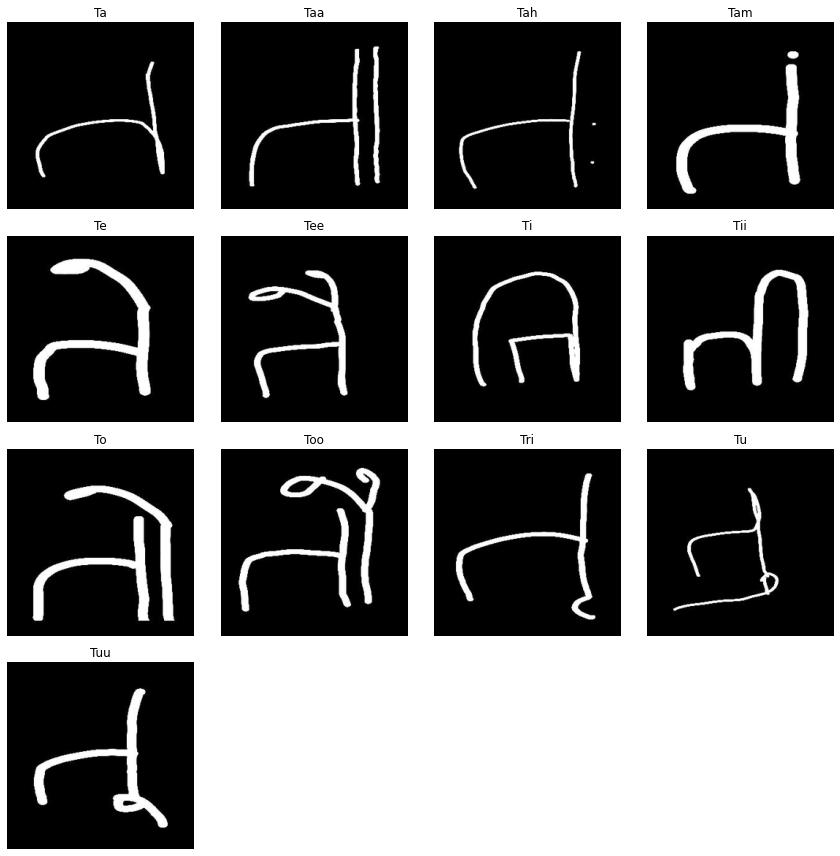

In [1]:
import os
import numpy as np
from PIL import Image, ImageOps
import umap
import matplotlib.pyplot as plt

# Set the path to the base directory containing 13 subfolders
base_data_dir = "C:\\Users\\91758\\Downloads\\padded images"

# Create a list of subdirectories within the base directory
subdirs = [os.path.join(base_data_dir, subdir) for subdir in os.listdir(base_data_dir)]

# Filter out non-directory entries
subdirs = [subdir for subdir in subdirs if os.path.isdir(subdir)]

# Set image dimensions
image_width, image_height = 256, 256

# Create empty lists to store image data and labels
image_data = []
labels = []

# Load and preprocess images from each subdirectory
for subdir in subdirs:
    subdir_name = os.path.basename(subdir)
    for image_file in os.listdir(subdir):
        image_path = os.path.join(subdir, image_file)
        image = Image.open(image_path).convert("L")
        image = ImageOps.fit(image, (image_width, image_height), method=Image.LANCZOS)
        image_array = np.array(image)
        image_data.append(image_array)
        labels.append(subdir_name)

# Convert the lists to arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Get unique class labels
unique_labels = np.unique(labels)

# Create a subplot grid
num_classes = len(unique_labels)
plt.figure(figsize=(12, 12))
grid_size = int(np.ceil(np.sqrt(num_classes)))

# Plot an image from each class
for i, class_label in enumerate(unique_labels):
    class_indices = np.where(labels == class_label)[0]
    selected_index = class_indices[0]
    selected_image = image_data[selected_index]
    
    plt.subplot(grid_size, grid_size, i + 1)
    plt.imshow(selected_image, cmap='gray')
    plt.title(class_label)
    plt.axis("off")

plt.tight_layout()
plt.show()
